In [1]:
# Import necessities 
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
from itertools import product
from tensorflow.keras.callbacks import EarlyStopping
import random
import matplotlib.pyplot as plt



In [2]:
# Hyperparameter tuning using a grid search



# Set seeds for reproducibility
SEED = 46
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)



# Define a function to create the model
def create_model(num_neurons, num_layers, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 56, 1)))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(19, activation='softmax'))  # Output layer

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

# Define the parameter grid
param_grid = {
    'num_neurons': [300,400,500],
    'num_layers': [2,3,4,5,6],
    'learning_rate': [0.01,0.001,0.0001],
    'batch_size': [60,80,100,120,140]
}

# Prepare the combined dataset 
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize

combined_images = []
labels = []
num_pairs = 20000  # Reduced for faster search
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    img1 = tf.image.resize(x_train[idx1], (28, 28))
    img2 = tf.image.resize(x_train[idx2], (28, 28))
    combined_img = tf.concat([img1, img2], axis=-2)

    combined_images.append(combined_img)
    labels.append(y_train[idx1] + y_train[idx2])

combined_images = np.array(combined_images)
labels = np.array(labels)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Perform grid search
best_model = None
best_acc = 0
best_params = None

for num_neurons, num_layers, learning_rate, batch_size in product(
    param_grid['num_neurons'],
    param_grid['num_layers'],
    param_grid['learning_rate'],
    param_grid['batch_size']
):
    print(f"Testing model with {num_neurons} neurons, {num_layers} layers, learning_rate={learning_rate}, batch_size={batch_size}")

    model = create_model(num_neurons, num_layers, learning_rate)
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=5,  # Reduced for faster grid search
        verbose=0,
        validation_data=(X_val, y_val),
    )

    val_acc = history.history['val_accuracy'][-1]
    print(f"Validation accuracy: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_model = model
        best_params = {
            'num_neurons': num_neurons,
            'num_layers': num_layers,
            'learning_rate': learning_rate,
            'batch_size': batch_size
        }

# Output the best configuration
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_acc:.4f}")

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Testing model with 300 neurons, 2 layers, learning_rate=0.01, batch_size=60
Validation accuracy: 0.6505
Testing model with 300 neurons, 2 layers, learning_rate=0.01, batch_size=80
Validation accuracy: 0.7035
Testing model with 300 neurons, 2 layers, learning_rate=0.01, batch_size=100
Validation accuracy: 0.6600
Testing model with 300 neurons, 2 layers, learning_rate=0.01, batch_size=120
Validation accuracy: 0.7030
Testing model with 300 neurons, 2 layers, learning_rate=0.01, batch_size=140
Validation accuracy: 0.7265
Testing model with 300 neurons, 2 layers, learning_rate=0.001, batch_size=60
Validation accuracy: 0.7430
Testing model with 300 neurons, 2 layers, learning_rate=0.001, batch_size=80
Validation accuracy: 0.7585
Testing model with 300 neurons, 2 layers, learning_rate=0.001, batch_size=100
Validation accuracy: 0.7365
Testing model with 300 neurons, 2 layers, learning_rate=0.001, batch_size=120
Validation accuracy: 0.7355
Testing model with 300 neurons, 2 layers, learning_rate

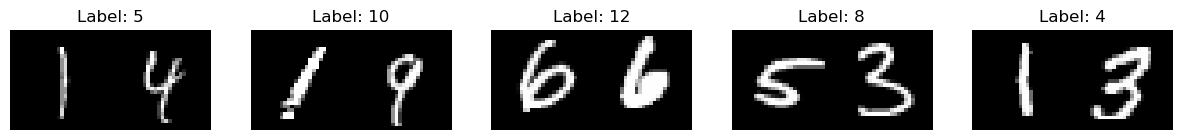

In [3]:
# Sample visualization of a few combined images
def plot_sample_images():
    fig, ax = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        ax[i].imshow(X_train[i].squeeze(), cmap="gray")
        ax[i].set_title(f"Label: {y_train[i]}")
        ax[i].axis('off')
    plt.show()

plot_sample_images()

In [4]:
# Hyperparameter tuning 2 using a grid search



# Set seeds for reproducibility
SEED = 36
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Define a function to create the model
def create_model(num_neurons, num_layers, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 56, 1)))
    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))
    model.add(Dense(19, activation='softmax'))  # Output layer

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )
    return model

# Define the parameter grid
param_grid = {
    'num_neurons': [400,500],
    'num_layers': [4,5],
    'learning_rate': [0.001],
    'batch_size': [60,80,100]
}

# Prepare the combined dataset (adapted from your original code)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize

combined_images = []
labels = []
num_pairs = 20000  # Reduced for faster search
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    img1 = tf.image.resize(x_train[idx1], (28, 28))
    img2 = tf.image.resize(x_train[idx2], (28, 28))
    combined_img = tf.concat([img1, img2], axis=-2)

    combined_images.append(combined_img)
    labels.append(y_train[idx1] + y_train[idx2])

combined_images = np.array(combined_images)
labels = np.array(labels)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Perform grid search
best_model = None
best_acc = 0
best_params = None

for num_neurons, num_layers, learning_rate, batch_size in product(
    param_grid['num_neurons'],
    param_grid['num_layers'],
    param_grid['learning_rate'],
    param_grid['batch_size']
):
    print(f"Testing model with {num_neurons} neurons, {num_layers} layers, learning_rate={learning_rate}, batch_size={batch_size}")

    model = create_model(num_neurons, num_layers, learning_rate)
    history2 = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=5,  # Reduced for faster grid search
        verbose=0,
        validation_data=(X_val, y_val),
    )

    val_acc = history2.history['val_accuracy'][-1]
    print(f"Validation accuracy: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_model = model
        best_params = {
            'num_neurons': num_neurons,
            'num_layers': num_layers,
            'learning_rate': learning_rate,
            'batch_size': batch_size
        }

# Output the best configuration
print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_acc:.4f}")

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Testing model with 400 neurons, 4 layers, learning_rate=0.001, batch_size=60
Validation accuracy: 0.8265
Testing model with 400 neurons, 4 layers, learning_rate=0.001, batch_size=80
Validation accuracy: 0.8250
Testing model with 400 neurons, 4 layers, learning_rate=0.001, batch_size=100
Validation accuracy: 0.8285
Testing model with 400 neurons, 5 layers, learning_rate=0.001, batch_size=60
Validation accuracy: 0.8245
Testing model with 400 neurons, 5 layers, learning_rate=0.001, batch_size=80
Validation accuracy: 0.8265
Testing model with 400 neurons, 5 layers, learning_rate=0.001, batch_size=100
Validation accuracy: 0.8345
Testing model with 500 neurons, 4 layers, learning_rate=0.001, batch_size=60
Validation accuracy: 0.8400
Testing model with 500 neurons, 4 layers, learning_rate=0.001, batch_size=80
Validation accuracy: 0.8450
Testing model with 500 neurons, 4 layers, learning_rate=0.001, batch_size=100
Validation accuracy: 0.8305
Testing model with 500 neurons, 5 layers, learning_r

In [5]:
# Our best performing model now trained on 100,000 pairs and using 20 epochs.



# Set seeds for reproducibility
SEED = 30
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Reproducing the combined dataset but for 100,000 pairs now that we have the best performing model
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize

combined_images = []
labels = []
num_pairs = 100000 
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    img1 = tf.image.resize(x_train[idx1], (28, 28))
    img2 = tf.image.resize(x_train[idx2], (28, 28))
    combined_img = tf.concat([img1, img2], axis=-2)

    combined_images.append(combined_img)
    labels.append(y_train[idx1] + y_train[idx2])

combined_images = np.array(combined_images)
labels = np.array(labels)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Our best performing model 
def create_model(num_neurons, num_layers, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 56, 1)))
    for _ in range(4):
        model.add(Dense(500, activation='relu'))
    model.add(Dense(19, activation='softmax'))  # Output layer

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

history3 = model.fit(
        X_train, y_train,
        batch_size=80,
        epochs=20, 
        verbose=1,
        validation_data=(X_val, y_val),
    )

Epoch 1/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4508 - accuracy: 0.8708 - val_loss: 0.3565 - val_accuracy: 0.8970
Epoch 2/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2549 - accuracy: 0.9260 - val_loss: 0.3142 - val_accuracy: 0.9140
Epoch 3/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1825 - accuracy: 0.9475 - val_loss: 0.2772 - val_accuracy: 0.9227
Epoch 4/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1430 - accuracy: 0.9580 - val_loss: 0.2311 - val_accuracy: 0.9383
Epoch 5/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1152 - accuracy: 0.9664 - val_loss: 0.2539 - val_accuracy: 0.9348
Epoch 6/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1005 - accuracy: 0.9709 - val_loss: 0.2593 - val_accuracy: 0.9385
Epoch 7/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0859 - accuracy: 0.9747 - val_loss: 0.2375 - val_accuracy:

In [6]:
# Our best performing model now trained on 100,000 pairs and using 20 epochs and with DROPOUT added 



# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Reproducing the combined dataset but for 100,000 pairs now that we have the best performing model
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize

combined_images = []
labels = []
num_pairs = 100000  
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    img1 = tf.image.resize(x_train[idx1], (28, 28))
    img2 = tf.image.resize(x_train[idx2], (28, 28))
    combined_img = tf.concat([img1, img2], axis=-2)

    combined_images.append(combined_img)
    labels.append(y_train[idx1] + y_train[idx2])

combined_images = np.array(combined_images)
labels = np.array(labels)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Our best performing model
def create_model(num_neurons, num_layers, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 56, 1)))
    for _ in range(4):
        model.add(Dense(500, activation='relu'))
        model.add(Dropout(0.2))
    model.add(Dense(19, activation='softmax'))  # Output layer

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model
history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=20,  
        verbose=1,
        validation_data=(X_val, y_val),
    )

Epoch 1/20
800/800 [==============================] - 5s 6ms/step - loss: 0.1663 - accuracy: 0.9594 - val_loss: 0.1438 - val_accuracy: 0.9645
Epoch 2/20
800/800 [==============================] - 5s 6ms/step - loss: 0.0776 - accuracy: 0.9783 - val_loss: 0.1449 - val_accuracy: 0.9652
Epoch 3/20
800/800 [==============================] - 5s 6ms/step - loss: 0.0538 - accuracy: 0.9842 - val_loss: 0.1627 - val_accuracy: 0.9642
Epoch 4/20
800/800 [==============================] - 5s 6ms/step - loss: 0.0431 - accuracy: 0.9877 - val_loss: 0.1496 - val_accuracy: 0.9679
Epoch 5/20
800/800 [==============================] - 5s 7ms/step - loss: 0.0412 - accuracy: 0.9886 - val_loss: 0.1648 - val_accuracy: 0.9672
Epoch 6/20
800/800 [==============================] - 5s 7ms/step - loss: 0.0358 - accuracy: 0.9900 - val_loss: 0.1559 - val_accuracy: 0.9670
Epoch 7/20
800/800 [==============================] - 6s 7ms/step - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.1768 - val_accuracy: 0.9681
Epoch 

In [12]:
# Our best performing model now trained on 100,000 pairs and using 20 epochs and with DROPOUT and BATCHNORMALISATION added 



# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Reproducing the combined dataset but for 100,000 pairs now that we have the best performing model
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize

combined_images = []
labels = []
num_pairs = 100000  
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    img1 = tf.image.resize(x_train[idx1], (28, 28))
    img2 = tf.image.resize(x_train[idx2], (28, 28))
    combined_img = tf.concat([img1, img2], axis=-2)

    combined_images.append(combined_img)
    labels.append(y_train[idx1] + y_train[idx2])

combined_images = np.array(combined_images)
labels = np.array(labels)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(combined_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Our best performing model
def create_model(num_neurons, num_layers, learning_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 56, 1)))
    for _ in range(4):
        model.add(Dense(500, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    model.add(Dense(19, activation='softmax'))  # Output layer

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

history5 = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=20,  
        verbose=1,
        validation_data=(X_val, y_val),
    )

Epoch 1/20
800/800 [==============================] - 6s 7ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 0.3941 - val_accuracy: 0.9679
Epoch 2/20
800/800 [==============================] - 5s 7ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.3615 - val_accuracy: 0.9671
Epoch 3/20
800/800 [==============================] - 6s 7ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.3759 - val_accuracy: 0.9714
Epoch 4/20
800/800 [==============================] - 6s 7ms/step - loss: 0.0122 - accuracy: 0.9979 - val_loss: 0.4469 - val_accuracy: 0.9676
Epoch 5/20
800/800 [==============================] - 6s 7ms/step - loss: 0.0122 - accuracy: 0.9979 - val_loss: 0.3806 - val_accuracy: 0.9647
Epoch 6/20
800/800 [==============================] - 6s 7ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.4296 - val_accuracy: 0.9663
Epoch 7/20
800/800 [==============================] - 6s 7ms/step - loss: 0.0110 - accuracy: 0.9983 - val_loss: 0.4429 - val_accuracy: 0.9694
Epoch 

In [13]:
# Question 2
# Save the weights of the best model
model.save_weights("best_model_weights.h5")
print("Model weights saved to 'best_model_weights.h5'")


Model weights saved to 'best_model_weights.h5'


In [14]:
# Question 2
model.load_weights("best_model_weights.h5")
print("Weights loaded successfully.")

Weights loaded successfully.


In [15]:
# Question 2

# Retrieve and display the weights
weights = model.get_weights()

# Print the weights layer by layer
for i, layer_weights in enumerate(weights):
    print(f"Layer {i} Weights:")
    print(layer_weights)
    print("-" * 50)


Layer 0 Weights:
[[-0.01463684  0.03454507 -0.04932314 ...  0.01997195 -0.01032636
   0.05353792]
 [-0.03947176 -0.0442237   0.00047191 ...  0.02583519  0.02813634
  -0.01661482]
 [ 0.03832719 -0.01049651 -0.0090774  ... -0.01483596 -0.01660833
   0.00103381]
 ...
 [ 0.04896607 -0.02455613 -0.03931791 ...  0.02775888  0.03732245
   0.04112551]
 [ 0.01813169 -0.0295661   0.03617106 ... -0.02921128 -0.03336206
   0.04653426]
 [-0.0220441  -0.05106172 -0.00373375 ...  0.03671292  0.03652987
  -0.02499271]]
--------------------------------------------------
Layer 1 Weights:
[ 4.11663651e-02 -1.75431460e-01 -2.39906207e-01 -8.36577192e-02
  2.44646385e-01  5.36004528e-02 -1.23581626e-02 -2.79243052e-01
 -2.71460339e-02 -4.26647179e-02 -1.44538488e-02 -2.53522635e-01
 -1.78548753e-01 -2.38054972e-02 -2.36160979e-01 -2.15465635e-01
 -5.34560978e-02 -1.55990258e-01 -2.17149124e-01 -2.14612007e-01
  1.03386305e-02 -8.31132475e-03 -1.65321127e-01 -1.17500514e-01
  1.20326243e-01 -1.59301292e-02 

313/313 [==============================] - 1s 2ms/step


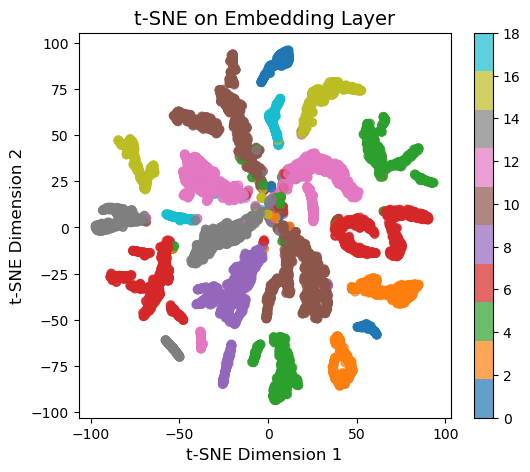

In [61]:
# Question 5

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
# Extract the embedding layer (last Dense layer before the output)
embedding_model = Model(inputs=model.input, outputs=model.layers[-2].output)
embedding_features = embedding_model.predict(X_test)

# Standardize the embedding features for t-SNE
scaler = StandardScaler()
embedding_features_scaled = scaler.fit_transform(embedding_features)

# Apply t-SNE on the embedding layer
tsne_embedding = TSNE(n_components=2, perplexity=30, random_state=SEED)
embedding_tsne_results = tsne_embedding.fit_transform(embedding_features_scaled)

# Apply t-SNE directly on the input dataset
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Flatten for t-SNE
tsne_input = TSNE(n_components=2, perplexity=30, random_state=SEED)
input_tsne_results = tsne_input.fit_transform(X_test_flat)

# Plot the t-SNE visualization
#plt.figure(figsize=(12, 6))

# t-SNE on the embedding layer
#plt.subplot(1, 2, 1)
scatter = plt.scatter(embedding_tsne_results[:, 0], embedding_tsne_results[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE on Embedding Layer')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.savefig("tSNE_Comparison.png")

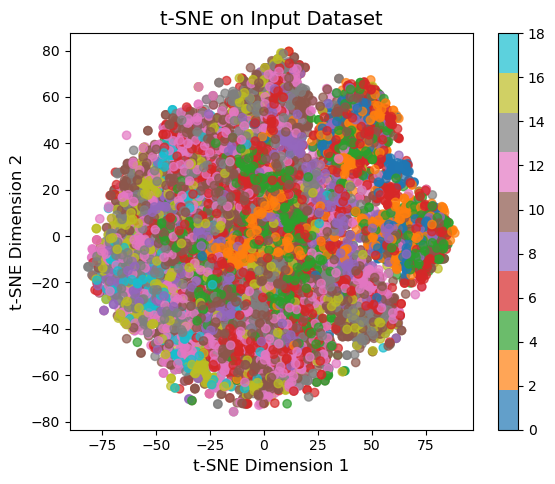

In [58]:
# Question 5

# Plot the t-SNE visualization

# t-SNE on the input dataset

scatter = plt.scatter(input_tsne_results[:, 0], input_tsne_results[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE on Input Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.tight_layout()
plt.savefig("tSNE_Comparison2.png")
plt.show()

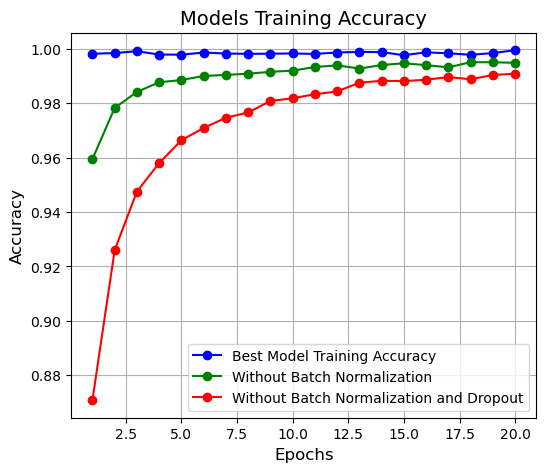

In [26]:
# Question 2

import matplotlib.pyplot as plt

# Ensure random seeds are set 
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Extract data from the history objects
epochs = range(1, len(history5.history['accuracy']) + 1)
train_acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
train_acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
train_acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

# Configure plot styling for reproducibility

plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.figsize': (6, 5),
    'savefig.dpi': 300
})

# Plot accuracy
plt.figure(figsize=(6, 5))
plt.plot(epochs, train_acc, label='Best Model Training Accuracy', marker='o', color='blue')
plt.plot(epochs, train_acc2, label='Without Batch Normalization', marker='o', color='green')
plt.plot(epochs, train_acc3, label='Without Batch Normalization and Dropout', marker='o', color='red')
plt.title('Models Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig("Model_Performance.png")
plt.show()


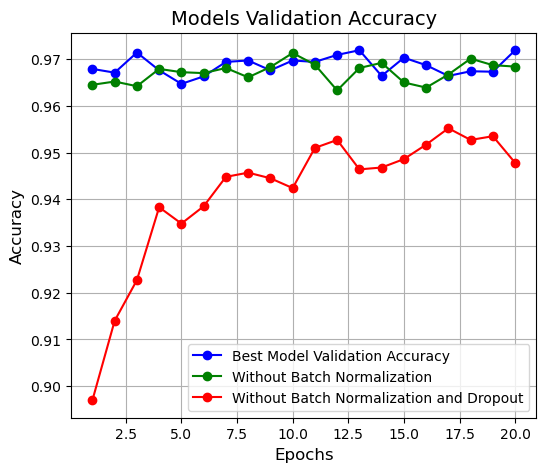

In [27]:
# Question 2

# Plot accuracy
plt.figure(figsize=(6, 5))
plt.plot(epochs, val_acc, label='Best Model Validation Accuracy', marker='o', color='blue')
plt.plot(epochs, val_acc2, label='Without Batch Normalization', marker='o', color='green')
plt.plot(epochs, val_acc3, label='Without Batch Normalization and Dropout', marker='o', color='red')
plt.title('Models Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Save the plot to a file
plt.savefig("Model_Performance2.png")
plt.show()

Training Random Forest...
Random Forest Accuracy: 0.7773
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       106
           1       0.92      0.97      0.94       202
           2       0.89      0.87      0.88       334
           3       0.86      0.83      0.84       412
           4       0.83      0.82      0.83       519
           5       0.82      0.81      0.82       639
           6       0.81      0.80      0.80       700
           7       0.82      0.78      0.80       802
           8       0.78      0.82      0.80       903
           9       0.72      0.83      0.77      1022
          10       0.72      0.75      0.74       885
          11       0.69      0.72      0.70       798
          12       0.69      0.76      0.72       665
          13       0.76      0.74      0.75       596
          14       0.84      0.65      0.73       497
          15       0.79      0.72      0.76       362
          16       0.82 

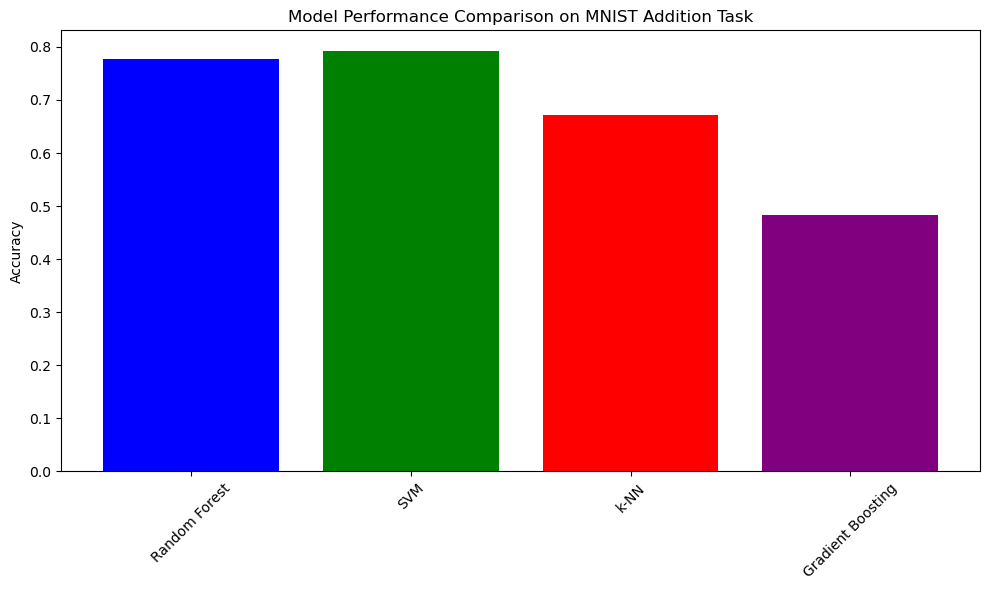

In [2]:
# Question 3


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your preprocessed dataset (combine images into 56x28 format and normalize)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0  # Normalize

combined_images = []
labels = []
num_pairs = 100000  # Adjust as needed
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    img1 = tf.image.resize(x_train[idx1], (28, 28))
    img2 = tf.image.resize(x_train[idx2], (28, 28))
    combined_img = tf.concat([img1, img2], axis=-2)

    combined_images.append(combined_img.numpy().flatten())  # Flatten for scikit-learn models
    labels.append(y_train[idx1] + y_train[idx2])

combined_images = np.array(combined_images)
labels = np.array(labels)

# Split the dataset
X_train, X_temp, y_train, y_temp = train_test_split(combined_images, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', C=1, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison on MNIST Addition Task')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Model_Performance_Comparison.png')
plt.show()


Single Classifier (n_samples=50): Accuracy = 0.1112
Single Classifier (n_samples=100): Accuracy = 0.1252
Single Classifier (n_samples=500): Accuracy = 0.1326
Single Classifier (n_samples=1000): Accuracy = 0.1409
Sequential Classifiers (n_samples=50): Accuracy = 0.0974
Sequential Classifiers (n_samples=100): Accuracy = 0.1014
Sequential Classifiers (n_samples=500): Accuracy = 0.1062
Sequential Classifiers (n_samples=1000): Accuracy = 0.1091


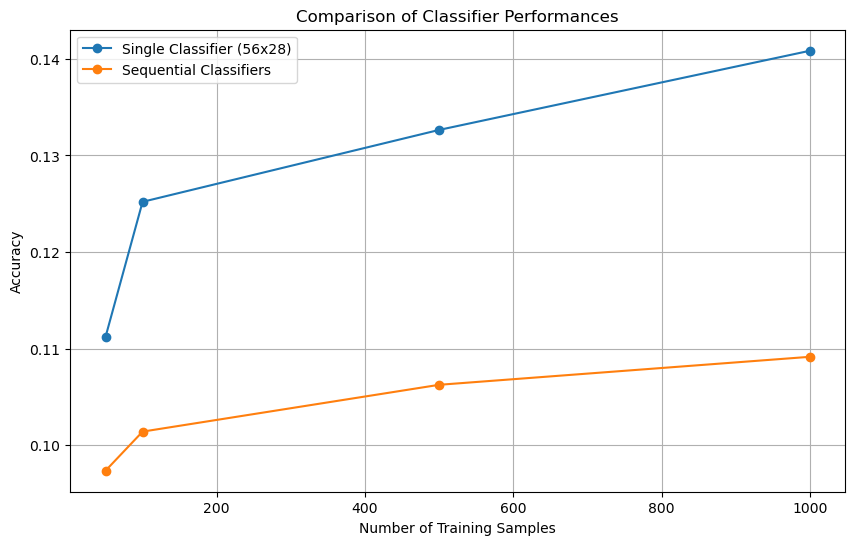

In [4]:
# Question 4

import numpy as np
import tensorflow as tf
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Set seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Load MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values to [0, 1]

# Ensure x_train has the shape (batch_size, height, width, channels)
if len(x_train.shape) == 3:  # If channels dimension is missing
    x_train = np.expand_dims(x_train, axis=-1)

# Generate the combined dataset (concatenate two images)
combined_images = []
labels = []
num_pairs = 100000  # Adjust as needed
for _ in range(num_pairs):
    idx1 = np.random.randint(0, len(x_train))
    idx2 = np.random.randint(0, len(x_train))

    # Combine two 28x28 images vertically (to form 56x28 image)
    img1 = x_train[idx1]  # Already in (28, 28, 1) shape
    img2 = x_train[idx2]
    combined_img = np.concatenate((img1, img2), axis=0)  # Combine vertically to (56, 28, 1)

    combined_images.append(combined_img)
    labels.append(y_train[idx1] + y_train[idx2])  # Sum of the labels

combined_images = np.array(combined_images)  # Shape: (num_pairs, 56, 28, 1)
labels = np.array(labels)

# Flatten the combined images for logistic regression
flattened_images = combined_images.reshape(combined_images.shape[0], -1)  # Shape: (num_pairs, 56*28)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(flattened_images, labels, test_size=0.2, random_state=SEED)

# Function to train a weak linear classifier
def train_linear_classifier(X_train, y_train, X_test, y_test, n_samples):
    X_train_subset = X_train[:n_samples]
    y_train_subset = y_train[:n_samples]
    
    # Train linear classifier
    model = LogisticRegression(max_iter=5000, random_state=SEED)
    model.fit(X_train_subset, y_train_subset)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc, model

# Evaluate single linear classifier on the 56x28 dataset
sample_sizes = [50, 100, 500, 1000]
single_classifier_accuracies = []

for n_samples in sample_sizes:
    acc, _ = train_linear_classifier(X_train, y_train, X_test, y_test, n_samples)
    single_classifier_accuracies.append(acc)
    print(f"Single Classifier (n_samples={n_samples}): Accuracy = {acc:.4f}")

# Sequential linear classifiers (train on each image separately)
def train_sequential_classifiers(X_train, y_train, X_test, y_test, n_samples):
    # Reshape back into 2D images to split into two parts
    X_train_reshaped = X_train.reshape(-1, 56, 28)  # (num_samples, 56, 28)
    X_test_reshaped = X_test.reshape(-1, 56, 28)

    # Split the combined dataset into two separate parts
    X1_train = X_train_reshaped[:, :28, :].reshape(X_train_reshaped.shape[0], -1)  # First 28x28 part, flattened
    X2_train = X_train_reshaped[:, 28:, :].reshape(X_train_reshaped.shape[0], -1)  # Second 28x28 part, flattened
    
    X1_test = X_test_reshaped[:, :28, :].reshape(X_test_reshaped.shape[0], -1)
    X2_test = X_test_reshaped[:, 28:, :].reshape(X_test_reshaped.shape[0], -1)
    
    y_train_subset = y_train[:n_samples]
    X1_train_subset = X1_train[:n_samples]
    X2_train_subset = X2_train[:n_samples]
    
    # Train two separate classifiers
    model1 = LogisticRegression(max_iter=5000, random_state=SEED)
    model2 = LogisticRegression(max_iter=5000, random_state=SEED)
    
    model1.fit(X1_train_subset, y_train_subset // 2)  # Approximate half of the sum
    model2.fit(X2_train_subset, y_train_subset // 2)
    
    # Predict from both classifiers
    y_pred1 = model1.predict(X1_test)
    y_pred2 = model2.predict(X2_test)
    
    # Combine predictions to estimate the sum
    y_pred = y_pred1 + y_pred2
    acc = accuracy_score(y_test, y_pred)
    return acc

sequential_classifier_accuracies = []

for n_samples in sample_sizes:
    acc = train_sequential_classifiers(X_train, y_train, X_test, y_test, n_samples)
    sequential_classifier_accuracies.append(acc)
    print(f"Sequential Classifiers (n_samples={n_samples}): Accuracy = {acc:.4f}")

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, single_classifier_accuracies, label="Single Classifier (56x28)", marker="o")
plt.plot(sample_sizes, sequential_classifier_accuracies, label="Sequential Classifiers", marker="o")
plt.xlabel("Number of Training Samples")
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Performances")
plt.legend()
plt.grid(True)
plt.show()
